In [2]:
import os
import toml
import pandas as pd
from utils.config_helper import update_nested_toml, load_config

breast
lung
prostate
stomach
rectal


prostate
stomach
rectal


In [31]:
TYPE = "prostate"
CONFIG_PATH = f"../config/{TYPE}.toml"
config = load_config(CONFIG_PATH)

In [4]:
def inspect_nan(df, name):
    print(df[pd.isna(df[name])])

In [5]:
beta_file_number = config["init"]["hyper"]["beta_file_number"]
test_ratio = config["init"]["hyper"]["test_ratio"]
seed = config["init"]["hyper"]["splitting_seed"]
normal_number_0 = config["init"]["hyper"]["normal_number_0"]
if beta_file_number == 2:
    normal_number_1 = config["init"]["hyper"]["normal_number_1"]
data_source = config["init"]["hyper"]["data_source"]
is_columns_duplicated = config["init"]["hyper"]["is_columns_duplicated"]
if data_source == "GDC_stomach_GSE99553":  # god forgive me
    is_columns_duplicated_1 = config["init"]["hyper"]["is_columns_duplicated_1"]

In [6]:
trainOutPath = f"../{TYPE}/result/{data_source}/train{int(100-test_ratio*100)}"
testOutPath = f"../{TYPE}/result/{data_source}/test{int(test_ratio*100)}"

### Section. 0 Merge and Split Champ Data

(if there are more than one normalized beta data)

#### Summary

- beta data is split into train and test
- all beta data will the following format
  - column 0 is the id of the sample
  - column 1 to n is the beta value of each CpG site
  - normal samples come first, then tumor samples


In [10]:
df0 = pd.read_csv(f"../{TYPE}/champ_result/{data_source}/all_beta_normalized_0.csv")

In [ ]:
if beta_file_number == 2:
    df1 = pd.read_csv(f"../{TYPE}/champ_result/{data_source}/all_beta_normalized_1.csv")

In [11]:
# DEBUG
df0
# END

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104
0,cg00000957,0.840645,0.840645,0.838333,0.838333,0.841180,0.841180,0.854801,0.854801,0.826240,...,0.858369,0.858369,0.847875,0.847875,0.881325,0.881325,0.845785,0.845785,0.879158,0.879158
1,cg00001349,0.868204,0.868204,0.875523,0.875523,0.708645,0.708645,0.763812,0.763812,0.618374,...,0.879759,0.879759,0.759153,0.759153,0.835826,0.835826,0.842740,0.842740,0.862857,0.862857
2,cg00001583,0.106897,0.106897,0.520205,0.520205,0.113957,0.113957,0.213113,0.213113,0.063247,...,0.790970,0.790970,0.100963,0.100963,0.247293,0.247293,0.642551,0.642551,0.709084,0.709084
3,cg00002028,0.026257,0.026257,0.034299,0.034299,0.030409,0.030409,0.016650,0.016650,0.026056,...,0.021136,0.021136,0.032977,0.032977,0.025518,0.025518,0.045711,0.045711,0.035661,0.035661
4,cg00002719,0.029272,0.029272,0.490811,0.490811,0.052727,0.052727,0.045307,0.045307,0.035076,...,0.713871,0.713871,0.542124,0.542124,0.137699,0.137699,0.621165,0.621165,0.483589,0.483589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373335,cg27656573,0.972378,0.972378,0.952102,0.952102,0.956166,0.956166,0.971104,0.971104,0.961684,...,0.948461,0.948461,0.943028,0.943028,0.969645,0.969645,0.950949,0.950949,0.963958,0.963958
373336,cg27657363,0.969164,0.969164,0.931059,0.931059,0.949989,0.949989,0.952977,0.952977,0.942600,...,0.936938,0.936938,0.931106,0.931106,0.935278,0.935278,0.939360,0.939360,0.953841,0.953841
373337,cg27657537,0.131392,0.131392,0.282966,0.282966,0.080608,0.080608,0.259545,0.259545,0.103994,...,0.445348,0.445348,0.592364,0.592364,0.293623,0.293623,0.538090,0.538090,0.671126,0.671126
373338,cg27662611,0.033896,0.033896,0.033763,0.033763,0.050093,0.050093,0.041935,0.041935,0.040316,...,0.029657,0.029657,0.031203,0.031203,0.031619,0.031619,0.035420,0.035420,0.055974,0.055974


In [ ]:
# DEBUG
df1
# END

In [12]:
# potential feature loss
if beta_file_number == 2:
    feature_name_0 = df0.iloc[:, 0].tolist()
    feature_name_1 = df1.iloc[:, 0].tolist()

    feature_name = list(set(feature_name_0).intersection(feature_name_1))
    update_nested_toml(
        "preprocess.merge_and_split", "feature_size_0", len(feature_name_0)
    )
    update_nested_toml(
        "preprocess.merge_and_split", "feature_size_1", len(feature_name_1)
    )
    update_nested_toml(
        "preprocess.merge_and_split", "feature_size_intersection", len(feature_name)
    )
elif beta_file_number == 1:
    feature_name = df0.iloc[:, 0].tolist()
    update_nested_toml(
        "preprocess.merge_and_split", "feature_size_0", len(feature_name)
    )

In [ ]:
if beta_file_number == 2:
    df0_join = df0[df0.iloc[:, 0].isin(feature_name)]
    df1_join = df1[df1.iloc[:, 0].isin(feature_name)]

In [13]:
if beta_file_number == 2:
    df0_join = df0_join.iloc[:, 1::is_columns_duplicated]
    if data_source == "GDC_stomach_GSE99553":  # god forgive me
        df1_join = df1_join.iloc[:, 1::is_columns_duplicated_1]
    df0_join.reset_index(drop=True, inplace=True)
    df1_join.reset_index(drop=True, inplace=True)
    df0_join_normal = df0_join.iloc[:, :normal_number_0]
    df0_join_tumor = df0_join.iloc[:, normal_number_0:]
    df1_join_normal = df1_join.iloc[:, :normal_number_1]
    df1_join_tumor = df1_join.iloc[:, normal_number_1:]
elif beta_file_number == 1:
    df0_join = df0.iloc[:, 1::is_columns_duplicated]

In [ ]:
if beta_file_number == 2:
    df_normal = pd.concat([df0_join_normal, df1_join_normal], axis=1)
    df_tumor = pd.concat([df0_join_tumor, df1_join_tumor], axis=1)

In [14]:
# drop those samples with missing value
# note: could use padding or other methods to fill the missing value

if beta_file_number == 2:
    update_nested_toml(
        "preprocess.merge_and_split", "Before_dropna_dfn_shape", df_normal.shape
    )
    update_nested_toml(
        "preprocess.merge_and_split", "Before_dropna_dfc_shape", df_tumor.shape
    )
    df_normal.dropna(inplace=True, axis=1)
    df_tumor.dropna(inplace=True, axis=1)
    update_nested_toml(
        "preprocess.merge_and_split", "After_dropna_dfn_shape", df_normal.shape
    )
    update_nested_toml(
        "preprocess.merge_and_split", "After_dropna_dfc_shape", df_tumor.shape
    )
elif beta_file_number == 1:
    update_nested_toml(
        "preprocess.merge_and_split", "Before_dropna_df_shape", df0_join.shape
    )
    df0_join.dropna(inplace=True, axis=1)
    update_nested_toml(
        "preprocess.merge_and_split", "After_dropna_df_shape", df0_join.shape
    )

In [15]:
if beta_file_number == 2:
    df = pd.concat([df_normal, df_tumor], axis=1)
    df.columns = range(df.shape[1])
elif beta_file_number == 1:
    df = df0_join
    df.columns = range(df.shape[1])

In [16]:
# DEBUG
df
# END

,0,1,2,3,4,5,6,7,8,9,...,542,543,544,545,546,547,548,549,550,551
0,0.840645,0.838333,0.841180,0.854801,0.826240,0.839864,0.835681,0.845313,0.855674,0.820812,...,0.879952,0.856336,0.898695,0.848139,0.861919,0.858369,0.847875,0.881325,0.845785,0.879158
1,0.868204,0.875523,0.708645,0.763812,0.618374,0.789586,0.898174,0.910121,0.827794,0.824775,...,0.761831,0.826998,0.873175,0.809439,0.758257,0.879759,0.759153,0.835826,0.842740,0.862857
2,0.106897,0.520205,0.113957,0.213113,0.063247,0.115878,0.036853,0.059293,0.216979,0.316795,...,0.454900,0.642892,0.529543,0.041976,0.466026,0.790970,0.100963,0.247293,0.642551,0.709084
3,0.026257,0.034299,0.030409,0.016650,0.026056,0.022185,0.032216,0.033701,0.040187,0.026860,...,0.063016,0.038909,0.030484,0.036654,0.096151,0.021136,0.032977,0.025518,0.045711,0.035661
4,0.029272,0.490811,0.052727,0.045307,0.035076,0.043521,0.035748,0.053425,0.101438,0.044884,...,0.678147,0.459975,0.257364,0.550145,0.055590,0.713871,0.542124,0.137699,0.621165,0.483589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373335,0.972378,0.952102,0.956166,0.971104,0.961684,0.970932,0.965015,0.962345,0.966851,0.961280,...,0.959056,0.968796,0.975243,0.931429,0.970975,0.948461,0.943028,0.969645,0.950949,0.963958
373336,0.969164,0.931059,0.949989,0.952977,0.942600,0.957143,0.949634,0.959346,0.966859,0.963408,...,0.936951,0.951141,0.954152,0.937321,0.909195,0.936938,0.931106,0.935278,0.939360,0.953841
373337,0.131392,0.282966,0.080608,0.259545,0.103994,0.161605,0.114482,0.132361,0.317090,0.315726,...,0.493928,0.408287,0.509749,0.501472,0.249234,0.445348,0.592364,0.293623,0.538090,0.671126
373338,0.033896,0.033763,0.050093,0.041935,0.040316,0.062835,0.076038,0.045769,0.074387,0.089901,...,0.048227,0.039081,0.047967,0.031870,0.076325,0.029657,0.031203,0.031619,0.035420,0.055974


In [17]:
config = load_config(CONFIG_PATH)
if beta_file_number == 1:
    normal_count = config["init"]["hyper"]["normal_number_0"]
elif beta_file_number == 2:
    normal_count = config["init"]["hyper"]["normal_number_0"] + config["init"]["hyper"]["normal_number_1"]
X = df.T
y = [(0 if i < normal_count else 1) for i in range((df.shape[1]))]

In [18]:
from collections import Counter
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_ratio, random_state=seed
)

train_class_distribution = Counter(y_train)
testing_class_distribution = Counter(y_test)

update_nested_toml("preprocess.merge_and_split", "training_set_samples", len(X_train))
update_nested_toml("preprocess.merge_and_split", "testing_set_samples", len(X_test))
update_nested_toml(
    "preprocess.merge_and_split",
    "train_class_distribution",
    [train_class_distribution[0], train_class_distribution[1]],
)
update_nested_toml(
    "preprocess.merge_and_split",
    "testing_class_distribution",
    [testing_class_distribution[0], testing_class_distribution[1]],
)

In [19]:
X_train.columns = feature_name
X_train["label"] = y_train
X_train = X_train.sort_values(by=["label"])
train_df = X_train.T
train_df.columns = range(train_df.shape[1])

X_test.columns = feature_name
X_test["label"] = y_test
X_test = X_test.sort_values(by=["label"])
test_df = X_test.T
test_df.columns = range(test_df.shape[1])

train_df.insert(0, "Unnamed: 0", train_df.index)
train_df.reset_index(drop=True, inplace=True)
test_df.insert(0, "Unnamed: 0", test_df.index)
test_df.reset_index(drop=True, inplace=True)

In [20]:
# DEBUG
train_df
# END

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,431,432,433,434,435,436,437,438,439,440
0,cg00000957,0.870264,0.860918,0.836230,0.873001,0.869963,0.838333,0.845822,0.832966,0.855674,...,0.844691,0.848617,0.829687,0.854382,0.866790,0.719155,0.853353,0.874233,0.845824,0.874194
1,cg00001349,0.800196,0.751929,0.881383,0.693593,0.801962,0.875523,0.709133,0.715697,0.827794,...,0.883599,0.853526,0.802451,0.784828,0.806655,0.807050,0.871244,0.842095,0.798027,0.898549
2,cg00001583,0.238307,0.107948,0.276198,0.104599,0.413745,0.520205,0.072687,0.084428,0.216979,...,0.055759,0.839655,0.404183,0.218870,0.416240,0.460923,0.469230,0.625404,0.490934,0.398857
3,cg00002028,0.007305,0.039278,0.046770,0.014147,0.020385,0.034299,0.017500,0.022534,0.040187,...,0.030430,0.048757,0.033635,0.035629,0.026609,0.050882,0.058028,0.043325,0.039651,0.020607
4,cg00002719,0.070367,0.042587,0.217565,0.044258,0.012981,0.490811,0.030961,0.041747,0.101438,...,0.669425,0.353333,0.629115,0.248093,0.292902,0.579469,0.505331,0.574570,0.543914,0.050160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373336,cg27657363,0.963831,0.939486,0.962673,0.968736,0.958273,0.931059,0.953028,0.959128,0.966859,...,0.961718,0.957895,0.935802,0.900551,0.957799,0.886265,0.950280,0.944172,0.924081,0.956472
373337,cg27657537,0.252799,0.199756,0.354418,0.151521,0.184640,0.282966,0.202402,0.216263,0.317090,...,0.475937,0.678200,0.598269,0.279611,0.432242,0.220012,0.453540,0.610849,0.607388,0.398151
373338,cg27662611,0.024713,0.045181,0.036858,0.032363,0.043058,0.033763,0.024260,0.071756,0.074387,...,0.033451,0.067349,0.247071,0.050552,0.043046,0.052090,0.020676,0.064249,0.051552,0.054754
373339,cg27665648,0.885381,0.863858,0.897231,0.868489,0.907487,0.824831,0.875100,0.868722,0.922943,...,0.822936,0.899166,0.858410,0.844948,0.893718,0.894881,0.873412,0.870542,0.897935,0.807358


In [21]:
# DEBUG
test_df
# END

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,101,102,103,104,105,106,107,108,109,110
0,cg00000957,0.845864,0.835681,0.853063,0.841180,0.840645,0.833973,0.854618,0.820812,0.862565,...,0.838264,0.844825,0.892887,0.867261,0.852356,0.823961,0.890865,0.830125,0.870176,0.857789
1,cg00001349,0.773967,0.898174,0.720905,0.708645,0.868204,0.782644,0.775534,0.824775,0.797306,...,0.797339,0.811410,0.836854,0.855619,0.853462,0.892725,0.854986,0.823448,0.897210,0.876160
2,cg00001583,0.144976,0.036853,0.279087,0.113957,0.106897,0.134871,0.329480,0.316795,0.046604,...,0.163597,0.292316,0.196342,0.640031,0.357947,0.534485,0.588813,0.147546,0.728655,0.276138
3,cg00002028,0.027506,0.032216,0.035949,0.030409,0.026257,0.033763,0.023366,0.026860,0.027793,...,0.061315,0.051471,0.038849,0.029779,0.038226,0.020759,0.035198,0.025986,0.030020,0.029392
4,cg00002719,0.058274,0.035748,0.045736,0.052727,0.029272,0.035318,0.047342,0.044884,0.042019,...,0.095846,0.657692,0.322644,0.612964,0.447518,0.849988,0.647744,0.147761,0.763429,0.128699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373336,cg27657363,0.948103,0.949634,0.948849,0.949989,0.969164,0.926727,0.944173,0.963408,0.951192,...,0.935086,0.923680,0.953148,0.949006,0.935257,0.945365,0.961405,0.979970,0.968018,0.954377
373337,cg27657537,0.204987,0.114482,0.277116,0.080608,0.131392,0.164756,0.144737,0.315726,0.101441,...,0.365117,0.469148,0.339899,0.490546,0.407895,0.604613,0.682518,0.154611,0.697369,0.213356
373338,cg27662611,0.047586,0.076038,0.042346,0.050093,0.033896,0.034158,0.032237,0.089901,0.065757,...,0.032431,0.061379,0.072765,0.056173,0.044317,0.018788,0.010555,0.027826,0.038915,0.039274
373339,cg27665648,0.908067,0.871213,0.879406,0.869885,0.875534,0.889955,0.901831,0.910694,0.931462,...,0.905337,0.870209,0.890811,0.935343,0.873291,0.923326,0.884342,0.888100,0.896972,0.926780


In [22]:
os.makedirs(f"{trainOutPath}", exist_ok=True)
os.makedirs(
    f"{testOutPath}",
    exist_ok=True,
)

train_df.to_csv(f"{trainOutPath}/all_beta_normalized_0.csv", index=False)
test_df.to_csv(f"{testOutPath}/all_beta_normalized_1.csv", index=False)

In [23]:
zip_filename = "beta_files.zip"

In [24]:
import zipfile

with zipfile.ZipFile(zip_filename, "w") as zipf:
    zipf.write(
        f"{trainOutPath}/all_beta_normalized_0.csv", arcname="all_beta_normalized_0.csv"
    )
    zipf.write(
        f"{testOutPath}/all_beta_normalized_1.csv", arcname="all_beta_normalized_1.csv"
    )

In [30]:
from api import utils
service = utils.authenticate_drive()

FileNotFoundError: [Errno 2] No such file or directory: 'credentials.json'

In [ ]:
directory = utils.create_folder(service, TYPE)

In [ ]:
utils.run_upload_with_separate_thread(service, directory, zip_filename)

In [ ]:
# downlaod the zip from drive
utils.download_file(service, directory, zip_filename)

### Sec. 1 dbeta calculation

#### Summary

- calculate the difference of beta value between tumor and normal samples
- the output file will have the following format
  - column 0 is the id of the sample
  - column 1 is the gene name
  - column 2 is the difference of beta value between tumor and normal samples

### Implementation

1. split normal and tumor samples
2. remove outliers in normal and tumor samples
3. calculate the mean of normal sammples
4. tumor - avg(normal)
5. calculate the mean of tumor samples
6. merge with DMP file
7. exclude the genes not in single comorbidity list


In [32]:
import gdown

##### Lung

https://drive.google.com/file/d/1BjBach5iyFb0n1DIG6Xc0ru3jMUtmlfW/view?usp=sharing

##### Rectal

https://drive.google.com/file/d/11DZAwbtqVriSN8EhUNhQEEwVyntiycRa/view?usp=sharing

##### Stomach

https://drive.google.com/file/d/1QBklKEO61ZYqxo-gfjBsWg3mcREsTRc7/view?usp=sharing

##### Prostate

tbd

##### Breast

tbd


In [ ]:
url = input()

output = 'download.zip'

In [ ]:
gdown.download(url, output, quiet=False)

In [13]:
import zipfile
import shutil

with zipfile.ZipFile("download.zip", "r") as zip_ref:
    zip_ref.extractall("download")

shutil.move("download/all_beta_normalized_0.csv", f"all_beta_normalized_0.csv")
shutil.move("download/all_beta_normalized_1.csv", f"all_beta_normalized_1.csv")

os.remove("download.zip")
shutil.rmtree("download")

In [7]:
train_df = pd.read_csv(f"{trainOutPath}/all_beta_normalized_0.csv")

In [8]:
def IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + IQR * 1.5
    lower_fence = Q1 - IQR * 1.5
    return upper_fence, lower_fence


def no_outlier(df):
    upper_fence, lower_fence = IQR(df)
    ddf = df[(df > lower_fence) & (df < upper_fence)]
    return ddf

In [9]:
config = load_config(CONFIG_PATH)
normal_count = config["preprocess"]["merge_and_split"]["train_class_distribution"][0]
all_beta_normalized_normal = train_df.iloc[:-1, 1 : normal_count + 1 :]


all_beta_normalized_tumor = train_df.iloc[:-1, normal_count + 1 : :]

In [10]:
all_beta_normalized_normal = no_outlier(all_beta_normalized_normal)
all_beta_normalized_tumor = no_outlier(all_beta_normalized_tumor)

In [11]:
train_normal_avg = all_beta_normalized_normal.mean(skipna=True, axis=1)

In [12]:
all_beta_normalized_tumor = (all_beta_normalized_tumor).subtract(
    train_normal_avg, axis=0
)

In [13]:
all_beta_normalized_tumor = no_outlier(all_beta_normalized_tumor)

In [14]:
train_tumor_mean = all_beta_normalized_tumor.mean(skipna=True, axis=1)

In [15]:
delta_beta = pd.merge(
    train_df.iloc[:-1, :1],
    pd.DataFrame(train_tumor_mean, columns=["dbeta"]),
    left_index=True,
    right_index=True,
)
update_nested_toml("preprocess.dbeta", "delta_beta_avg", delta_beta.shape[0])

In [16]:
# print(delta_beta[pd.isna(delta_beta["dbeta"])])
# record the list of feature with dbeta being NaN
update_nested_toml(
    "preprocess.dbeta",
    "NaN_dbeta_feature",
    delta_beta.loc[pd.isna(delta_beta["dbeta"]), "Unnamed: 0"].tolist(),
)
delta_beta.dropna(inplace=True, axis=0)
update_nested_toml("preprocess.dbeta", "delta_beta_avg_remove_NaN", delta_beta.shape[0])

In [17]:
dmp = pd.read_csv(f"../{TYPE}/champ_result/{data_source}/DMP_result_0.csv")
dmp = dmp[["Unnamed: 0", "gene", "feature"]]
update_nested_toml("preprocess.dbeta", "dmp_before_dropna_shape_feature", dmp.shape[0])
dmp.dropna(inplace=True)
update_nested_toml("preprocess.dbeta", "dmp_after_dropna_shape_feature", dmp.shape[0])

In [18]:
result = pd.merge(delta_beta, dmp, on="Unnamed: 0", how="left")
update_nested_toml(
    "preprocess.dbeta", "delta_beta_avg_remove_NaN_with_gene_name", result.shape[0]
)

In [19]:
def find_max_dBeta_grouped(group):
    idx_max = group["dbeta"].abs().idxmax()
    return group.loc[idx_max]


dbeta = result.groupby("gene", as_index=False).apply(
    find_max_dBeta_grouped, include_groups=False
)

In [20]:
dbeta.columns = ["gene", "ID", "dbeta", "feature"]
dbeta = dbeta[["ID", "gene", "dbeta", "feature"]]
# DEBUG
dbeta
# END

,ID,gene,dbeta,feature
0,cg22286978,A1BG,0.015412,Body
1,cg27394794,A1CF,0.001436,Body
2,cg03391464,A2BP1,-0.063304,Body
3,cg01723761,A2LD1,-0.039286,TSS200
4,cg15688197,A2M,-0.026060,Body
...,...,...,...,...
18647,cg00692173,ZYG11B,0.056019,Body
18648,cg03489712,ZYX,0.044513,TSS1500
18649,cg12087627,ZZEF1,0.040839,Body
18650,cg22221847,ZZZ3,-0.028334,3'UTR


In [ ]:
# comorbidity = pd.read_csv(
#     "../external_result/matchgene174_single_3Y10__OR2.txt", sep="\t", header=None
# )
# dbeta = dbeta[
#     dbeta["gene"].isin(comorbidity[0])
# ]

# result_max_per_gene_single

In [21]:
dbeta.to_csv(f"{trainOutPath}/dbeta.csv", index=False)

### Sec. 2 Filter genes by dbeta values

1. filter genes by dbeta values
2. filter genes by TSS position
3. plot distribution of dbeta values
4. plot PCA for normal and tumor


In [ ]:
# dbeta = pd.read_csv(f"{trainOutPath}/dbeta.csv")

#### Filtering TSS


In [22]:
TSS = dbeta[dbeta["feature"].str.contains("TSS")]

In [23]:
TSS.to_csv(f"{trainOutPath}/dbeta_TSS.csv", index=False)

#### Thresholding


In [33]:
threshold = 0.5
TSS_threshold = TSS[abs(TSS["dbeta"]) > threshold]
while True:
    TSS_threshold = TSS[abs(TSS["dbeta"]) > threshold]
    count = TSS_threshold.shape[0]
    if (
        config["preprocess"]["filtering"]["hyper"]["avg_dbeta_lower_bound"]
        <= count
        <= config["preprocess"]["filtering"]["hyper"]["avg_dbeta_upper_bound"]
    ):
        break
    threshold -= 0.01
threshold = round(threshold, 2)
update_nested_toml("preprocess.filtering", "threshold", threshold)

In [34]:
TSS_threshold.to_csv(f"{trainOutPath}/dbeta_TSS_{threshold}.csv", index=False)

#### Visualization


Text(0.5, 1.0, 'Density plot of delta Beta value')

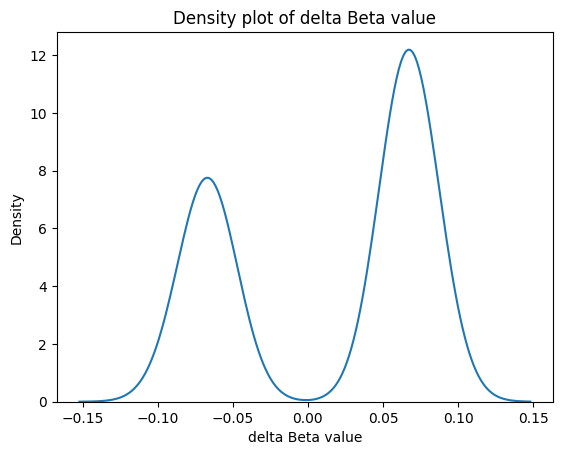

In [36]:
# DEBUG
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(TSS_threshold["dbeta"])
plt.xlabel("delta Beta value")
plt.title("Density plot of delta Beta value")
# END

In [ ]:
# train_df = pd.read_csv(f"{trainOutPath}/all_beta_normalized_0.csv")

In [37]:
normal_count = (train_df.iloc[-1, 1:] == 0).sum()
df_gene = train_df.iloc[:-1, :]
df_gene = df_gene[df_gene[df_gene.columns[0]].isin(dbeta["ID"])]
X = df_gene.iloc[:, 1:].reset_index(drop=True).T
y = [0 if i < normal_count else 1 for i in range(X.shape[0])]
# DEBUG
print(f"X shape: {X.shape}")
print(f"y shape: {len(y)}")
# END

X shape: (441, 18652)
y shape: 441


In [40]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

df = pd.DataFrame(
    {
        "Principal Component 1": X_pca[:, 0],
        "Principal Component 2": X_pca[:, 1],
        "Principal Component 3": X_pca[:, 2],
        "Class": y,
    }
)
print(df.shape)
fig = px.scatter_3d(
    df,
    x="Principal Component 1",
    y="Principal Component 2",
    z="Principal Component 3",
    color="Class",
    title="PCA of Dataset",
    color_continuous_scale="Viridis",
)

fig.update_layout(
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
        zaxis_title="Principal Component 3",
    )
)

# fig.show()

fig.write_html(f"{trainOutPath}/preprocess_filtering_pca.html")
# open in browser

(441, 4)


### Sec. 3 Machine Learning

1. remove hypo-methylated genes
2. RFE
3. RFECV (tbd)


In [41]:
config = load_config(CONFIG_PATH)
threshold = config["preprocess"]["filtering"]["threshold"]
TSS_threshold = pd.read_csv(f"{trainOutPath}/dbeta_TSS_{threshold}.csv")

In [42]:
TSS_threshold_hyper = TSS_threshold[TSS_threshold["dbeta"] > 0]
# DEBUG
TSS_threshold_hyper
# END

,ID,gene,dbeta,feature
0,cg11157076,AADACL4,0.070200,TSS1500
3,cg10710218,ACOT11,0.066661,TSS1500
4,cg22277847,ACPT,0.068159,TSS200
5,cg06048973,ACTC1,0.060187,TSS200
7,cg16061947,ADRBK1,0.065961,TSS1500
...,...,...,...,...
506,cg02315483,ZNF155,0.060501,TSS1500
510,cg02026535,ZNF358,0.069014,TSS1500
515,cg02234314,ZNF628,0.078744,TSS1500
516,cg19925872,ZNF710,0.063823,TSS1500


In [43]:
train_df = pd.read_csv(f"{trainOutPath}/all_beta_normalized_0.csv")
test_df = pd.read_csv(f"{testOutPath}/all_beta_normalized_1.csv")

In [44]:
X_train = train_df[train_df["Unnamed: 0"].isin(TSS_threshold_hyper["ID"])]
X_test = test_df[test_df["Unnamed: 0"].isin(TSS_threshold_hyper["ID"])]

In [45]:
X_train = X_train.iloc[:, 1:].T.values.tolist()
X_test = X_test.iloc[:, 1:].T.values.tolist()

In [46]:
config = load_config(CONFIG_PATH)
normal_count_train = config["preprocess"]["merge_and_split"][
    "train_class_distribution"
][0]
normal_count_test = config["preprocess"]["merge_and_split"][
    "testing_class_distribution"
][0]
y_train = [0 if i < normal_count_train else 1 for i in range(len(X_train))]
y_test = [0 if i < normal_count_test else 1 for i in range(len(X_test))]

In [51]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    roc_curve,
    auc,
)

In [53]:
def get_model(name):
    if name == "SVM":
        return SVC(kernel="linear")
    elif name == "LR":
        return LogisticRegression(max_iter=1000)
    elif name == "DT":
        return DecisionTreeClassifier()
    elif name == "RF":
        return RandomForestClassifier()
    elif name == "XGB":
        return XGBClassifier()
    else:
        raise ValueError(f"Unknown model name: {name}")


models = [
    "SVM",
    "LR",
    "DT",
    "RF",
    "XGB",
]


def append_to_file(file_name, data):
    if not os.path.isfile(file_name):
        data.to_csv(file_name, index=False)
    else:
        data.to_csv(file_name, index=False, mode="a", header=False)


for train_model_name in models:
    train_model = get_model(train_model_name)
    for feature_count in range(20, 100):
        rfe = RFE(estimator=train_model, n_features_to_select=feature_count)
        X_train_rfe = rfe.fit_transform(X_train, y_train)

        selected_feature_names = (
            pd.DataFrame(TSS_threshold_hyper.iloc[rfe.support_, 0])
            .reset_index(drop=True)
            .T
        )

        label = f"{train_model_name}_{feature_count}"
        selected_feature_names.insert(0, "train_model_name", label)

        append_to_file(f"{trainOutPath}/selected_feature_names.csv", selected_feature_names)

        for test_model_name in models:
            test_model = get_model(test_model_name)
            test_model.fit(X_train_rfe, y_train)

            # cross_val_score: Evaluate a score by cross-validation with accuracy as the scoring method
            train_accuracy_cv = cross_val_score(
                test_model, X_train_rfe, y_train, cv=5, scoring="accuracy"
            ).mean()

            # performace on test set
            X_test_rfe = rfe.transform(X_test)
            y_pred = test_model.predict(X_test_rfe)
            X_test_df = pd.DataFrame(X_test)
            incorrect_indices = X_test_df.index[y_pred != y_test]

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            mcc = matthews_corrcoef(y_test, y_pred)
            # 1 is perfect prediction, -1 is imperfect prediction, 0 is equal to random prediction
            fpr, tpr, _ = roc_curve(y_test, y_pred)
            roc_auc = auc(fpr, tpr)

            new_performance_row = pd.DataFrame(
                [
                    {
                        "train_model": train_model_name,
                        "test_model": test_model_name,
                        "features": feature_count,
                        "AUC": roc_auc,
                        "accuracy (5-fold-Cross-Validation)": train_accuracy_cv,
                        "accuracy": accuracy,
                        "precision": precision,
                        "recall": recall,
                        "f1_score": f1,
                        "MCC": mcc,
                        "J-index": recall + accuracy - (1 - recall) - 1,
                        "incorrect predictions count": len(incorrect_indices),
                    }
                ]
            )
            append_to_file(f"{trainOutPath}/results.csv", new_performance_row)

            new_fpr_tpr_row = pd.DataFrame(
                [
                    {
                        "train_model": train_model_name,
                        "test_model": test_model_name,
                        "features": feature_count,
                        "fpr": fpr,
                        "tpr": tpr,
                        "AUC": roc_auc,
                    }
                ]
            )
            append_to_file(f"{trainOutPath}/fpr_tpr.csv", new_fpr_tpr_row)